In [90]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
cd projects/foldtree2

[Errno 2] No such file or directory: 'projects/foldtree2'
/home/dmoi/projects/foldtree2


In [92]:
import sys
sys.path.append('/home/dmoi/projects/foldtree2')
#read the afdb clusters file
import pandas as pd
import numpy as np
import glob
import os
#autoreload
import pickle
from src import AFDB_tools
import tqdm

In [4]:
datadir = '../../datasets/foldtree2/'

In [5]:

#read the afdb rep file
reps = pd.read_table( datadir + 'afdbclusters/1-AFDBClusters-entryId_repId_taxId.tsv', header=None, names=['entryId', 'repId', 'taxId'] )
print( 'reps' , reps.head() )


reps       entryId       repId    taxId
0  A0A009E921  A0A009E921  1310605
1  A0A009F5K6  A0A009E921  1310605
2  A0A009E9H3  A0A009E9H3  1310605
3  A0A484ZLT0  A0A009E9H3    82979
4  A0A009ECR5  A0A009ECR5  1310605


In [6]:
repdirs = '../../datasets/foldtree2/struct_align/'

In [9]:
#make a structure alignment directory
if not os.path.exists( 'struct_align' ):
    os.makedirs( 'struct_align' )

#make a directory for each cluster representative
for rep in reps['repId']:
    if not os.path.exists( datadir +'struct_align/' + rep  ):
        os.makedirs(datadir + 'struct_align/' + rep  )
    if not os.path.exists( datadir+ 'struct_align/' + rep  + '/structs/'):
        os.makedirs( datadir+ 'struct_align/' + rep + '/structs/' )
        

In [69]:
#download n struct members for each cluster
dl_structs = False
if dl_structs == True:
    n = 5
    for rep in tqdm.tqdm(reps.repId.unique() ):
        subdf = reps[ reps['repId'] == rep ]
        if len(subdf) < n:
            n = len(subdf)
        subdf = subdf.sample( n = n  )
        subdf = subdf.head( n )
        #download the structures
        for uniID in subdf['entryId']:
            AFDB_tools.grab_struct(uniID , structfolder=datadir+'struct_align/' + rep  + '/structs/')

100%|████████████████████████████████████████████████████████████████████████████| 3691/3691 [10:59<00:00,  5.59it/s]


In [11]:
#for each folder in struct_align, align the structures with all vs all using foldseek
from src import foldseek2tree
aln_structs = False
if aln_structs == True:
    for rep in tqdm.tqdm(reps.repId.unique() ):
        #align the structures
        foldseek2tree.runFoldseek_allvall_EZsearch( infolder= datadir + 'struct_align/' + rep  + '/structs/', outpath=datadir+'struct_align/' + rep + '/allvall.csv' )


In [12]:
encoded_fasta = '/home/dmoi/projects/foldtree2/aln_encoded_test.fasta' 

seqstr = ''
ID = ''
seqdict = {}
with open(encoded_fasta, 'r') as f:
    #read all chars of file into a string
    for line in tqdm.tqdm(f):
        if line[0] == '>' and line[-1] == '\n':
            seqdict[ID] = seqstr
            ID = line[1:].strip()
            seqstr = ''
        else:
            seqstr += line.strip()
del seqdict['']
encoded_df = pd.DataFrame( seqdict.items() , columns=['protid', 'seq'] )
#change index to protid
encoded_df.index = encoded_df.protid
encoded_df = encoded_df.drop( 'protid', axis=1 )
print(encoded_df)

34it [00:00, 121885.76it/s]

                                                          seq
protid                                                       
A0A0B0EGE4  «Ëy<<Ûf¿^^¿÷¿>ÓoTÓyÓ³¤¤<<ß¶ßß¤é÷¤÷÷^D§>>¿¿¿<...
A0A6M1Q9D4  ¿¿¤÷÷ã<÷^y>¤_y=Û`¿÷y`¿ß§¹¤§ß¤DDß`¹¿^y^Ó...
A0A7W6LMN5  ËË^.óÛ¹Ó¶D¶³³yo8¹^Û¹ ð«@8«ó^¾@@¾8@^Ü¤ßß.¶ßã...
A0A090ZGQ5  ËËó¹.y¿}Ó÷^§ó^T_8§_y<¤^Ó¤ÓßÃÛfUÃ¶ß`88y_f`...
A0A378RLJ5  ËËÛ§T§D=i§f¤>ß>ß`ßß¤T=} Â}ßÛDßSyDT@ß>§...
A0A5B0KKX9  ËË¤¤=}@ßÓ8ÃÂÂ¤¤8ß8²ß¤¤Û}ßßDß¹_Û¤÷\¤ÂÂ¹@...
A0A7W9D427  Ëòzóäñ6@o@^À¶ð³y@ÛÓ^^UÓÀÓ8Óðo^}óÃ8Ó¤=...
A0A3S6F348  ËËã²SßT¿÷ßßT÷÷ß¿÷fT=ßß§TT¤`ß`§¿¿§T}§...
A0A2W5HHN3  ËË¶¶z`@¶@¿\ÛózÛ@i^¶}ÛgUHgHËg8...


In [13]:
encoded_fasta = '/home/dmoi/projects/foldtree2/aln_encoded.fasta' 

seqstr = ''
ID = ''
seqdict = {}
with open(encoded_fasta, 'r') as f:
    #read all chars of file into a string
    for line in tqdm.tqdm(f):
        if line[0] == '>' and line[-1] == '\n':
            seqdict[ID] = seqstr
            ID = line[1:].strip()
            seqstr = ''
        else:
            seqstr += line.strip()
del seqdict['']
encoded_df = pd.DataFrame( seqdict.items() , columns=['protid', 'seq'] )
#change index to protid
encoded_df.index = encoded_df.protid
encoded_df = encoded_df.drop( 'protid', axis=1 )
print(encoded_df)

47966it [00:00, 1053832.42it/s]

                                                          seq
protid                                                       
A0A0B0EGE4  «Ëy<<Ûf¿^^¿÷¿>ÓoTÓyÓ³¤¤<<ß¶ßß¤é÷¤÷÷^D§>>¿¿¿<...
A0A6M1Q9D4  ¿¿¤÷÷ã<÷^y>¤_y=Û`¿÷y`¿ß§¹¤§ß¤DDß`¹¿^y^Ó...
A0A7W6LMN5  ËË^.óÛ¹Ó¶D¶³³yo8¹^Û¹ ð«@8«ó^¾@@¾8@^Ü¤ßß.¶ßã...
A0A090ZGQ5  ËËó¹.y¿}Ó÷^§ó^T_8§_y<¤^Ó¤ÓßÃÛfUÃ¶ß`88y_f`...
A0A378RLJ5  ËËÛ§T§D=i§f¤>ß>ß`ßß¤T=} Â}ßÛDßSyDT@ß>§...
...                                                       ...
A0A1S1RYR8  ËËÛH%Ã}HHH@ógzz%gägz@<¶z_Ë@z@@go%Aóè\...
A0A7V9B3G1  ËËHHÃHUHHÃHÃózzñ`óìä ä ½×ÇAÇÇì...
A0A7V9SPK7  ËËgg\ÃHUHHÃHHèÃóÃ@¶\Aä^óäæÓñÓ×ÓB<ó...
A0A7W0K3F8  ËË%%HH%UóH%ggä%ìz<gAgóäñäñäñ¶@¶¶Aä...
A0A3M8HC38  ËËißÛÃ\\¤UHHÃU_²²U8SÂÂS8ÚU8SÉ²8UÃ²8Ãã÷¹Ã...

[8077 rows x 1 columns]


In [70]:
#find union of all sets of characters for sequences
char_set = set()
for seq in encoded_df.seq:
    char_set = char_set.union( set( seq ) )
char_set = list( char_set )
char_set.sort()
print( char_set )

['\x00', '\x01', '\x02', '\x04', '\x06', '\x08', '\t', '\x0f', '\x11', '\x12', '\x14', '\x15', '\x17', '\x18', '\x1a', '\x1b', '\x1d', '\x1f', ' ', '#', '%', '&', ')', '-', '.', '0', '1', '5', '6', '8', ':', '<', '=', '>', '?', '@', 'A', 'B', 'D', 'E', 'H', 'K', 'L', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'W', 'X', 'Y', 'Z', '[', '\\', '^', '_', '`', 'b', 'c', 'd', 'f', 'g', 'i', 'n', 'o', 'p', 'u', 'v', 'y', 'z', '{', '|', '}', '~', '\x80', '\x81', '\x82', '\x83', '\x84', '\x85', '\x87', '\x88', '\x89', '\x8a', '\x8b', '\x8d', '\x90', '\x91', '\x93', '\x94', '\x95', '\x96', '\x97', '\x99', '\x9a', '\x9c', '\x9d', '\x9e', '\xa0', '¡', '¢', '£', '¤', '¥', '§', '«', '¬', '\xad', '±', '²', '³', '¶', '¹', 'º', '»', '½', '¾', '¿', 'À', 'Á', 'Â', 'Ã', 'Ä', 'Æ', 'Ç', 'È', 'É', 'Ë', 'Í', 'Î', 'Ï', 'Ò', 'Ó', '×', 'Ú', 'Û', 'Ü', 'Ý', 'ß', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'ï', 'ð', 'ñ', 'ò', 'ó', 'õ', 'ö', '÷']


In [71]:
charset = 248
#0x01 – 0xFF excluding > (0x3E), = (0x3D), < (0x3C), - (0x2D), Space (0x20), Carriage Return (0x0d) and Line Feed (0x0a)
replace_dict = { '>' : chr(249), '=' : chr(250), '<' : chr(251), '-' : chr(252), ' ' : chr(253) , '\r' : chr(254), '\n' : chr(255) }
for i in range( charset ):
    #print hex and ascii
    char = chr(i) if chr(i) not in replace_dict.keys() else replace_dict[ chr(i) ]
    print( ord(char), char ,  hex(i) )


0   0x0
1  0x1
2  0x2
3  0x3
4  0x4
5  0x5
6  0x6
7  0x7
8 0x8
9 	 0x9
255 ÿ 0xa
11  0xb
12  0xc
254 þ 0xd
14  0xe
15  0xf
16  0x10
17  0x11
18  0x12
19  0x13
20  0x14
21  0x15
22  0x16
23  0x17
24  0x18
25  0x19
26  0x1a
27  0x1b
28  0x1c
29  0x1d
30  0x1e
31  0x1f
253 ý 0x20
33 ! 0x21
34 " 0x22
35 # 0x23
36 $ 0x24
37 % 0x25
38 & 0x26
39 ' 0x27
40 ( 0x28
41 ) 0x29
42 * 0x2a
43 + 0x2b
44 , 0x2c
252 ü 0x2d
46 . 0x2e
47 / 0x2f
48 0 0x30
49 1 0x31
50 2 0x32
51 3 0x33
52 4 0x34
53 5 0x35
54 6 0x36
55 7 0x37
56 8 0x38
57 9 0x39
58 : 0x3a
59 ; 0x3b
251 û 0x3c
250 ú 0x3d
249 ù 0x3e
63 ? 0x3f
64 @ 0x40
65 A 0x41
66 B 0x42
67 C 0x43
68 D 0x44
69 E 0x45
70 F 0x46
71 G 0x47
72 H 0x48
73 I 0x49
74 J 0x4a
75 K 0x4b
76 L 0x4c
77 M 0x4d
78 N 0x4e
79 O 0x4f
80 P 0x50
81 Q 0x51
82 R 0x52
83 S 0x53
84 T 0x54
85 U 0x55
86 V 0x56
87 W 0x57
88 X 0x58
89 Y 0x59
90 Z 0x5a
91 [ 0x5b
92 \ 0x5c
93 ] 0x5d
94 ^ 0x5e
95 _ 0x5f
96 ` 0x60
97 a 0x61
98 b 0x62
99 c 0x63
100 d 0x64
101 e 0x65

In [72]:

cols = 'query,target,fident,alnlen,mismatch,gapopen,qstart,qend,tstart,tend,evalue,bits,qaln,taln'.split(',')
alnfiles = glob.glob(datadir + 'struct_align/*/allvall.csv')
submat =  np.zeros((256,256))
for rep in tqdm.tqdm(alnfiles ):
    #load the all vs all aln
    aln_df = pd.read_table(rep)
    aln_df.columns = cols
    #load the embedding of the structures
    q = aln_df['query'].unique()
    t = aln_df['target'].unique()
    representative = rep.split('/')[-2]
    for q in aln_df['query'].unique():
        for t in aln_df['target'].unique():
            if q != t:
                #align the structures
                aln = aln_df[ (aln_df['query'] == q) & (aln_df['target'] == t) ]
                if len(aln)> 0 :
                    aln = aln.iloc[0]
                    qaln = aln.qaln
                    taln = aln.taln
                    qaccession = q.split( '.' )[0]
                    taccession = t.split( '.' )[0]

                    if qaccession in encoded_df.index and taccession in encoded_df.index:
                        qz = str(encoded_df.loc[qaccession].seq[aln.qstart-1:aln.qend])
                        tz = str(encoded_df.loc[taccession].seq[aln.tstart-1:aln.tend])
                        if len( qz) == len( qaln.replace('-','') ) and len( tz) == len( taln.replace('-','') ):
                            qz = iter(qz)
                            tz = iter(tz)

                            #transfer the alignments to the embeddings                    
                            qaln_ft2, taln_ft2 = [], []

                            for q_char in qaln:
                                if q_char == '-':
                                    qaln_ft2.append(None)
                                else:
                                    qaln_ft2.append(ord(next(qz)))
                                   
                            for t_char in taln.strip():
                                if t_char == '-':
                                    taln_ft2.append(None)
                                else:
                                    taln_ft2.append(ord(next(tz)))

                            alnzip = list(zip( qaln_ft2 , taln_ft2 ))
                            alnzip = np.array([ [a[0] , a[1]] for a in alnzip if a[0] is not None and a[1] is not None])
                            submat[alnzip[:,0] , alnzip[:,1]] += 1
                        

100%|███████████████████████████████████████████████████████████████████████████| 3691/3691 [00:35<00:00, 102.65it/s]


In [73]:
submat = submat + submat.T
submat = submat / 2


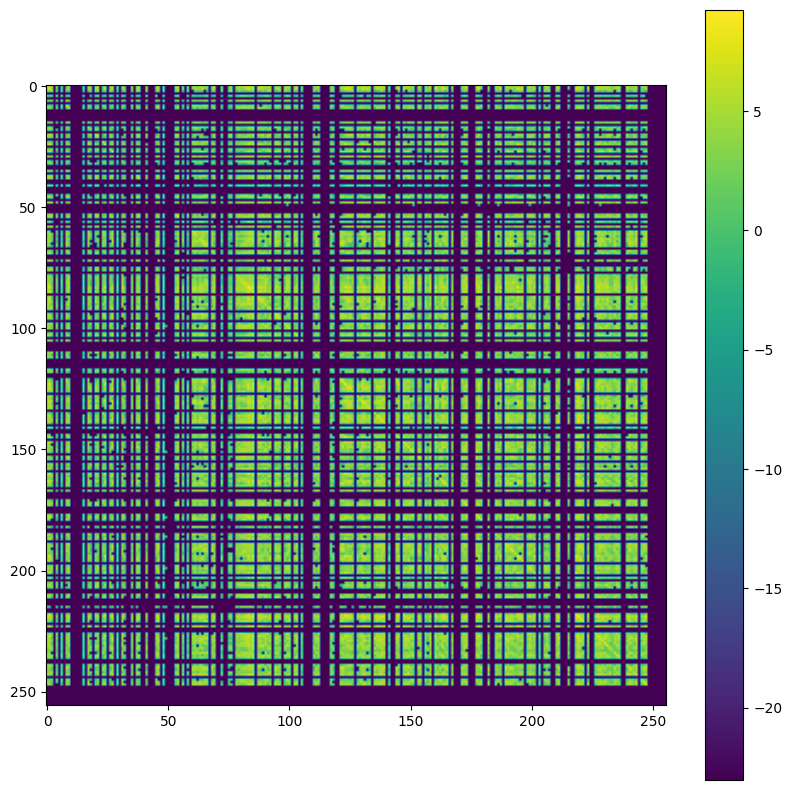

(array([40532.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,   334.,  1770.,  4700.,
         8875.,  8062.,  1168.,    95.]),
 array([-23.02585093, -21.41290928, -19.79996763, -18.18702598,
        -16.57408432, -14.96114267, -13.34820102, -11.73525937,
        -10.12231772,  -8.50937607,  -6.89643441,  -5.28349276,
         -3.67055111,  -2.05760946,  -0.44466781,   1.16827384,
          2.7812155 ,   4.39415715,   6.0070988 ,   7.62004045,
          9.2329821 ]),
 <BarContainer object of 20 artists>)

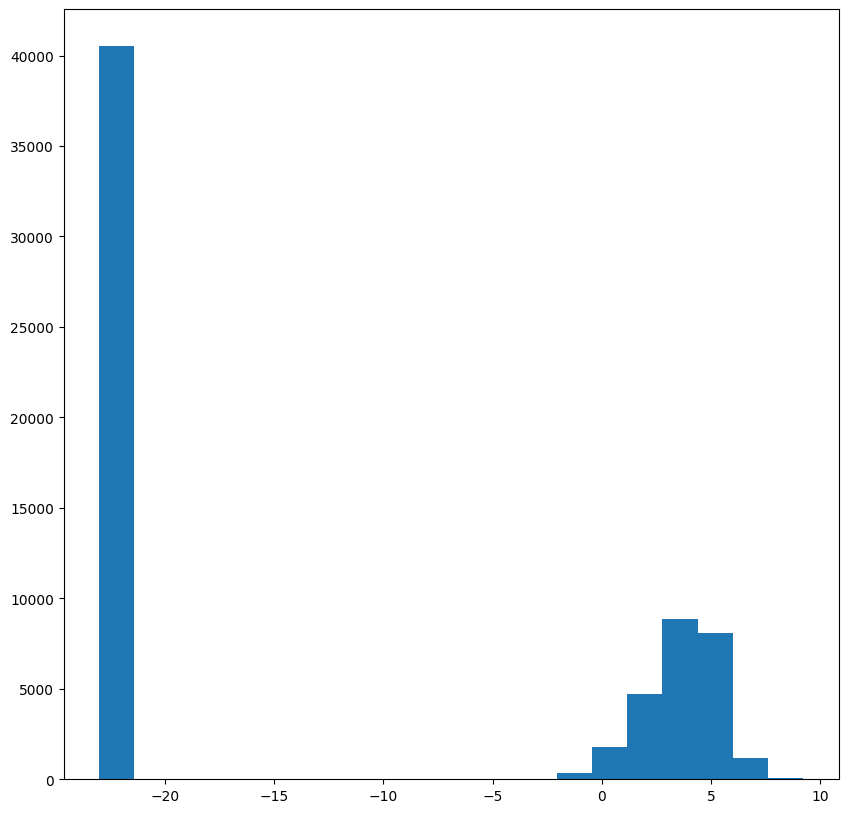

In [74]:
from matplotlib import pyplot as plt
plt.figure( figsize=(10,10))
plt.imshow(np.log(submat + 10**-10 ) )
plt.colorbar()

plt.show()
plt.figure( figsize=(10,10))

plt.hist( np.log( submat.flatten() + 10 **-10 )  , bins = 20)

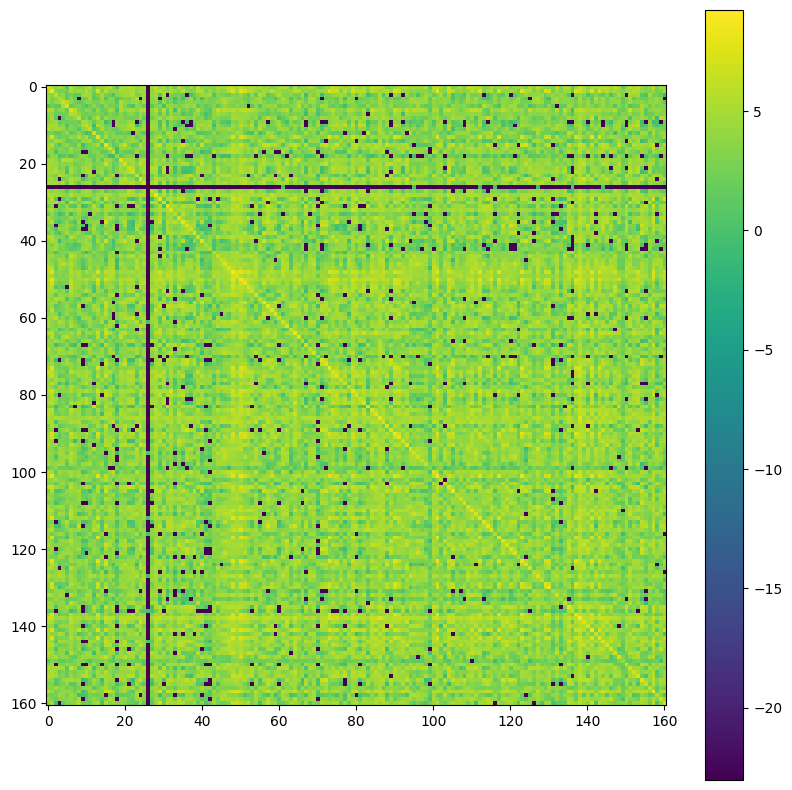

In [76]:
#remove zero rows and columns for visualization

vismat = submat[ np.sum(submat, axis=1) > 0 , : ]
vismat = vismat[ :, np.sum(vismat, axis=0) > 0 ]

plt.figure( figsize=(10,10))
plt.imshow(np.log(vismat + 10**-10 ) )
plt.colorbar()


In [78]:
#mafft matrix file example max 248 char
"""
0x01 0x01 2   # (comment)
0x1e 0x1e 2
0x1f 0x1f 2
0x21 0x21 2   # ! × !
0x41 0x41 2   # A × A
0x42 0x42 2   # B × B
0x43 0x43 2   # C × C
"""

def formathex(hexnum):
    if len(hexnum) == 3:
        return hexnum[0:2] + '0' + hexnum[2]
    else:
        return hexnum

def output_mafft_matrix( submat , outpath='mafft_submat.mtx' ):
    with open(outpath, 'w') as f:
        for i in range(submat.shape[0]):
            for j in range(submat.shape[1]):
                if i < j:
                    
                    stringi = chr(i)
                    stringj = chr(j)
                    
                    if stringi in replace_dict.keys():
                        stringi = replace_dict[stringi]
                    if stringj in replace_dict.keys():
                        stringj = replace_dict[stringj]
                    
                    i = ord(stringi)
                    j = ord(stringj)

                    hexi = formathex(hex(i))
                    hexj = formathex(hex(j))
                    
                    if submat[i,j] > 1:
                        f.write( f'{hexi} {hexj} {submat[i,j]} # '+ stringi + 'x' + stringj + ' \n' )
                    else:
                        f.write( f'{hexi} {hexj} {0.0} # '+ stringi + 'x' + stringj + ' \n' )
output_mafft_matrix( submat , outpath='mafft_submat.mtx' )
with open('mafft_submat.mtx', 'r') as f:
    for line in f:
        print(line)

0x00 0x01 167.0 #  x 

0x00 0x02 49.5 #  x 

0x00 0x03 0.0 #  x 

0x00 0x04 113.0 #  x 

0x00 0x05 0.0 #  x 

0x00 0x06 60.5 #  x 

0x00 0x07 0.0 #  x 

0x00 0x08 2.0 #   

0x00 0x09 277.0 #  x	 

0x00 0xff 0.0 #  xÿ 

0x00 0x0b 0.0 #  x 

0x00 0x0c 0.0 #  x 

0x00 0xfe 0.0 #  xþ 

0x00 0x0e 0.0 #  x 

0x00 0x0f 44.0 #  x 

0x00 0x10 0.0 #  x 

0x00 0x11 22.0 #  x 

0x00 0x12 30.0 #  x 

0x00 0x13 0.0 #  x 

0x00 0x14 89.5 #  x 

0x00 0x15 217.0 #  x 

0x00 0x16 0.0 #  x 

0x00 0x17 6.5 #  x 

0x00 0x18 48.5 #  x 

0x00 0x19 0.0 #  x 

0x00 0x1a 47.0 #  x 

0x00 0x1b 97.5 #  x 

0x00 0x1c 0.0 #  x 

0x00 0x1d 295.5 #  x 

0x00 0x1e 0.0 #  x 

0x00 0x1f 45.5 #  x 

0x00 0xfd 0.0 #  xý 

0x00 0x21 0.0 #  x! 

0x00 0x22 0.0 #  x" 

0x00 0x23 140.5 #  x# 

0x00 0x24 0.0 #  x$ 

0x00 0x25 106.0 #  x% 

0x00 0x26 219.0 #  x& 

0x00 0x27 0.0 #  x' 

0x00 0x28 0.0 #  x( 

0x00 0x29 139.0 #  x) 

0x00 0x2a 0.0 #  x* 

0x00 0x2b 0.0 #  x+ 

0x00 0x2c 0.0 #  x, 

0x00 0

In [58]:
#align the structures
# mafft --textmatrix maff_submat.mtx input > output

In [59]:
#iqtree matrix file example 
"""   A   C   G   T   X
A  0   1   2   1   0.5
C  1   0   1   2   0.2
G  2   1   0   1   0.3
T  1   2   1   0   0.1
X  0.5 0.2 0.3 0.1  0
"""
    


'   A   C   G   T   X\nA  0   1   2   1   0.5\nC  1   0   1   2   0.2\nG  2   1   0   1   0.3\nT  1   2   1   0   0.1\nX  0.5 0.2 0.3 0.1  0\n'

In [89]:

def output_iqtree_matrix( submat , outpath='iqtree_submat.mtx' ):
  #write out distmat in phylip compatible format
  init = ' '.join( [ chr(i) if chr(i) not in replace_dict else replace_dict[chr(i)] for i in range(submat.shape[0]) ] )
  with open(outpath, 'w') as  f:
      f.write( init + '\n' )
      outstr = ''
      for i in range(submat.shape[0]):
        chr_i = chr(i) if chr(i) not in replace_dict else replace_dict[chr(i)]
        outstr += chr_i + ' ' + ' '.join( [ "{:.4f}".format(d) for d in list( submat[i,: ] )  ]  ) + '\n'
      f.write( outstr )
  return outpath

output_iqtree_matrix( submat , outpath='iqtree_submat.mtx' )

with open('iqtree_submat.mtx', 'r') as f:
    for line in f:
        print(line)

         	 ÿ   þ                   ý ! " # $ % & ' ( ) * + , ü . / 0 1 2 3 4 5 6 7 8 9 : ; û ú ù ? @ A B C D E F G H I J K L M N O P Q R S T U V W X Y Z [ \ ] ^ _ ` a b c d e f g h i j k l m n o p q r s t u v w x y z { | } ~                                    ¡ ¢ £ ¤ ¥ ¦ § ¨ © ª « ¬ ­ ® ¯ ° ± ² ³ ´ µ ¶ · ¸ ¹ º » ¼ ½ ¾ ¿ À Á Â Ã Ä Å Æ Ç È É Ê Ë Ì Í Î Ï Ð Ñ Ò Ó Ô Õ Ö × Ø Ù Ú Û Ü Ý Þ ß à á â ã ä å æ ç è é ê ë ì í î ï ð ñ ò ó ô õ ö ÷ ø ù ú û ü ý þ ÿ

  1437.0000 167.0000 49.5000 0.0000 113.0000 0.0000 60.5000 0.0000 2.0000 277.0000 0.0000 0.0000 0.0000 0.0000 0.0000 44.0000 0.0000 22.0000 30.0000 0.0000 89.5000 217.0000 0.0000 6.5000 48.5000 0.0000 47.0000 97.5000 0.0000 295.5000 0.0000 45.5000 1.5000 0.0000 0.0000 140.5000 0.0000 106.0000 219.0000 0.0000 0.0000 139.0000 0.0000 0.0000 0.0000 59.0000 108.5000 0.0000 178.0000 0.0000 0.0000 0.0000 0.0000 102.0000 272.5000 0.0000 38.5000 0.0000 154.0000 0.0000 10.5000 96.0000 5.0000 2

In [ ]:
import subprocess

def run_mafft_textaln( infasta , outaln , matrix='mafft_submat.mtx' ):
    cmd = f'mafft --textmatrix {matrix} {infasta} > {outaln}'
    print(cmd)
    subprocess.run(cmd, shell=True)
    return outaln

def run_iqtree_aln( infasta , outaln , matrix='iqtree_submat.mtx' ):
    cmd = f'iqtree -s {infasta} -m I+GTR+G -n 0 -pre {outaln} -t {matrix}'
    print(cmd)
    subprocess.run(cmd, shell=True)
    return outaln


In [ ]:
#get all example structures in a directory
structs = glob.glob('families/fsx1/*.pdb')
print(structs)

#use the encoder to make a fasta file


#align wti mafft



#make a tree with iqtree

In [ ]:

#save the submats in raw form
for charset in charsets:
    np.save( 'submats/' + str(charset) + '.npy' , submats[charset] )
    with open( 'submats/' + str(charset) + '.txt' , 'w' ) as f:
        for i in range( charset ):
            f.write( '\t'.join( [ str(submats[charset][i,j]) for j in range( charset ) ] ) + '\n' )

#normalize the submats rows and columns to sum to 1
for charset in charsets:
    rowsums = submats[charset].sum( axis=1 )
    colsums = submats[charset].sum( axis=0 )
    for i in range( charset ):
        submats[charset][i,:] = submats[charset][i,:] / rowsums[i]
        submats[charset][:,i] = submats[charset][:,i] / colsums[i]

#save the submats in normalized form
for charset in charsets:
    np.save( 'submats/' + str(charset) + '_norm.npy' , submats[charset] )
    with open( 'submats/' + str(charset) + '_norm.txt' , 'w' ) as f:
        for i in range( charset ):
            f.write( '\t'.join( [ str(submats[charset][i,j]) for j in range( charset ) ] ) + '\n' )
    



In [ ]:
#make tree
#iqtree -s example.fasta -m ./iqtree_submat.mtx+I+F

#reconstruct
#iqtree -s example.fasta -m ./iqtree_submat.mtx+I+F -t treefile.tree -asr


In [ ]:
#pass the asr through the decoder to get ancestral AA sequences

#fold the amino acid asr and decoded asr into 3d structures using alphafold

#compare plddts
